In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fresh_spectra_df = pd.read_excel('./spectra_FH_Abs_STD_1100_2498nm_STD.xlsx')
chemical_df = pd.read_excel('./chemical_analysis.xlsx')

In [4]:
wavelength = np.arange(1100, 2500, 2)

In [5]:
fresh_spectra = fresh_spectra_df.values[:,1:]
cattle_spectra = np.append(fresh_spectra[0:180], fresh_spectra[316:], axis = 0)
poultry_spectra = fresh_spectra[180:316]

In [6]:
def visualize_spectra(matrix,title):
    num_lines = matrix.shape[0]  # Số đường trên đồ thị
    plt.figure(figsize=(8, 4))
    # Vẽ đồ thị
    for i in range(num_lines):
        plt.plot(wavelength, matrix[i, :])

    plt.xlabel('Wavelength')  # Nhãn trục X
    plt.ylabel('Reflectance')  # Nhãn trục Y
    plt.title(title)  # Tiêu đề đồ thị

    plt.show()  # Hiển thị đồ thị

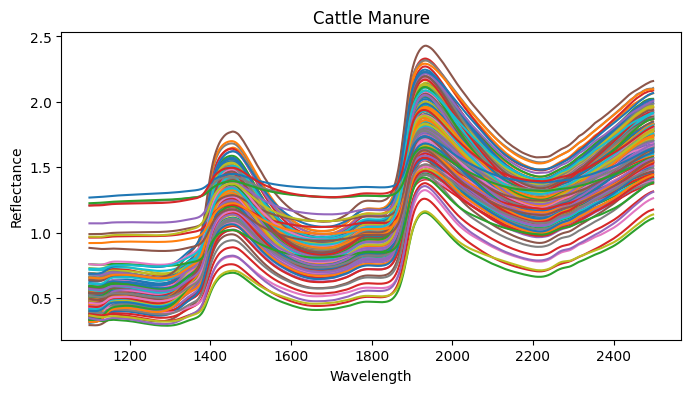

In [7]:
visualize_spectra(cattle_spectra,'Cattle Manure')

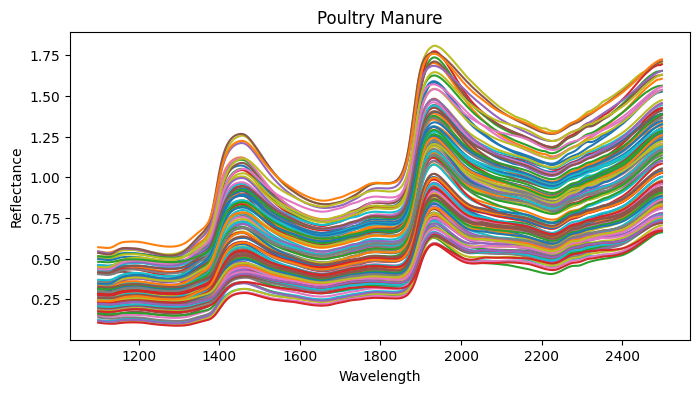

In [8]:
visualize_spectra(poultry_spectra,'Poultry Manure')

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(fresh_spectra)
scale_cattle_spectra = np.append(scale_data[0:180], scale_data[316:], axis = 0)
scale_poultry_spectra = scale_data[180:316]

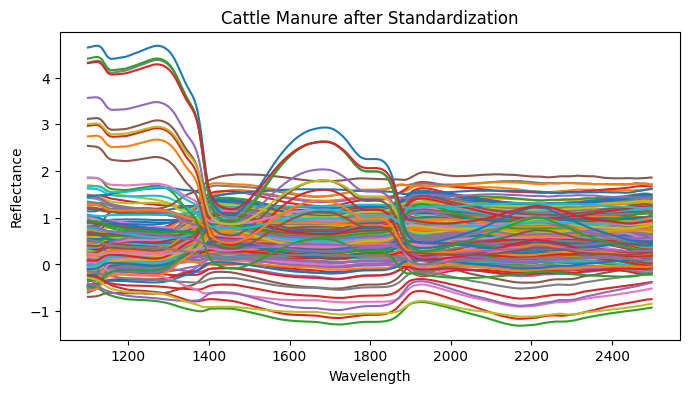

In [11]:
visualize_spectra(scale_cattle_spectra,'Cattle Manure after Standardization')

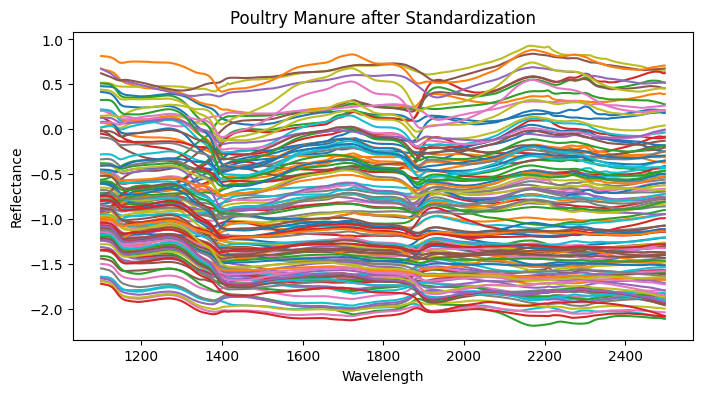

In [12]:
visualize_spectra(scale_poultry_spectra,'Poultry Manure after Standardization')

In [13]:
chemical_df

,sample_name,DM,NH4,N,CaO,K2O,MgO,P2O5,type_manure,spectrometer,township,country
0,FBCRIF001,20.815,0.075,0.490,NaN,NaN,NaN,NaN,cattle manure,NIRFlex LDAR,DERVAL,mainland France
1,FBCRIF002,25.480,0.182,0.607,0.157,0.791,0.079,0.131,cattle manure,NIRFlex LDAR,DERVAL,mainland France
2,FBCRIF003,17.595,0.203,0.546,0.208,0.690,0.094,0.160,cattle manure,NIRFlex LDAR,DERVAL,mainland France
3,FBCRIF004,19.110,0.091,0.482,0.260,0.542,0.121,0.187,cattle manure,NIRFlex LDAR,CHATEAUNEUF DU FAOU,mainland France
4,FBCRIF005,18.600,0.089,0.458,NaN,NaN,NaN,NaN,cattle manure,NIRFlex LDAR,CHATEAUNEUF DU FAOU,mainland France
...,...,...,...,...,...,...,...,...,...,...,...,...
327,R_FERM_48_FBV_LT,37.350,0.052,0.632,NaN,NaN,NaN,NaN,cattle manure,XDS FOSS CIRAD,TROIS BASSINS,Reunion Island
328,R_FERM_49_FBV_LT,34.340,0.045,0.432,NaN,NaN,NaN,NaN,cattle manure,XDS FOSS CIRAD,TROIS BASSINS,Reunion Island
329,R_FERM_50_FBV_LT,25.690,0.068,0.536,NaN,NaN,NaN,NaN,cattle manure,XDS FOSS CIRAD,SAINT BENOIT,Reunion Island
330,R_FERM_69_FBV,30.660,0.154,0.642,NaN,NaN,NaN,NaN,cattle manure,XDS FOSS CIRAD,BOURG MURAT,Reunion Island


In [14]:
chemical_data = chemical_df.values[:,1:8]
DM = chemical_data[:,0]
NH4 = chemical_data[:,1]
N = chemical_data[:,2]
CaO = chemical_data[:,3]
K2O = chemical_data[:,4]
MgO = chemical_data[:,5]
P2O5 = chemical_data[:,6]

In [15]:
data = [NH4, N, CaO, K2O, MgO, P2O5]

c:\Users\MinhNhat\anaconda3\envs\NCKH2023\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Users\MinhNhat\anaconda3\envs\NCKH2023\lib\site-packages\matplotlib\cbook\__init__.py:1269: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\Users\MinhNhat\anaconda3\envs\NCKH2023\lib\site-packages\matplotlib\cbook\__init__.py:1277: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\Users\MinhNhat\anaconda3\envs\NCKH2023\lib\site-packages\matplotlib\cbook\__init__.py:1278: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


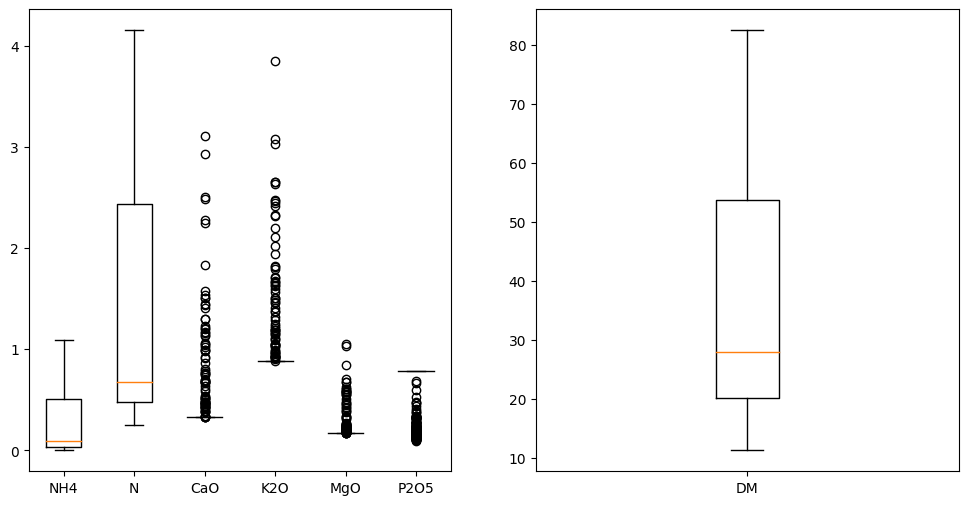

In [16]:
fig = plt.figure(figsize =(12, 6))
ax_1 = fig.add_subplot(121)
bp_1 = ax_1.boxplot(data)
ax_1.set_xticklabels(['NH4', 'N', 'CaO', 'K2O', 'MgO', 'P2O5'])
ax_2 = fig.add_subplot(122)
bp_2 = ax_2.boxplot([DM])
ax_2.set_xticklabels(['DM'])
plt.show()

In [17]:
data_df = chemical_df[['DM','NH4', 'N', 'CaO', 'K2O', 'MgO', 'P2O5']]
scale_data_df = scaler.fit_transform(data_df)

In [18]:
scale_DM = scale_data_df[:,0]
scale_N = scale_data_df[:,2]
scale_NH4 = scale_data_df[:,1]
scale_CaO = scale_data_df[:,3]
scale_MgO = scale_data_df[:,5]
scale_K2O = scale_data_df[:,4]
scale_P2O5 = scale_data_df[:,6]

In [19]:
scale_data = [scale_NH4, scale_N, scale_CaO[~pd.isnull(scale_CaO)], scale_K2O[~pd.isnull(scale_K2O)], scale_MgO[~pd.isnull(scale_MgO)], scale_P2O5[~pd.isnull(scale_P2O5)]]

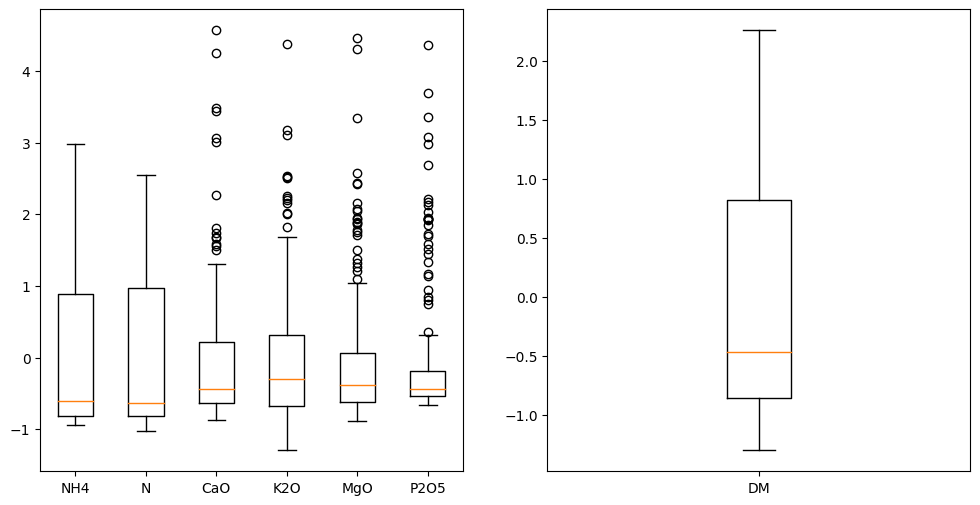

In [20]:
fig = plt.figure(figsize =(12, 6))
ax_1 = fig.add_subplot(121)
bp_1 = ax_1.boxplot(scale_data)
ax_1.set_xticklabels(['NH4', 'N', 'CaO', 'K2O', 'MgO', 'P2O5'])
ax_2 = fig.add_subplot(122)
bp_2 = ax_2.boxplot([scale_DM])
ax_2.set_xticklabels(['DM'])
plt.show()

In [27]:
wl_interval = [{1404: 1498, 1876: 1892},
               {1386: 1528}]

In [31]:
def visualize_spectra_special(matrix, title, wl_interval):
    num_lines = matrix.shape[0]  # Số đường trên đồ thị
    plt.figure(figsize=(8, 4))
    # Vẽ đồ thị
    for i in range(num_lines):
        plt.plot(wavelength, matrix[i, :])
    
    color = ['red', 'green', 'yellow', 'blue', ''] 
    for start in wl_interval.keys():
        plt.axvspan(start, wl_interval[start], alpha=0.4, color='red')

    plt.xlabel('Wavelength')  # Nhãn trục X
    plt.ylabel('Reflectance')  # Nhãn trục Y
    plt.title(title)  # Tiêu đề đồ thị

    plt.show()  # Hiển thị đồ thị

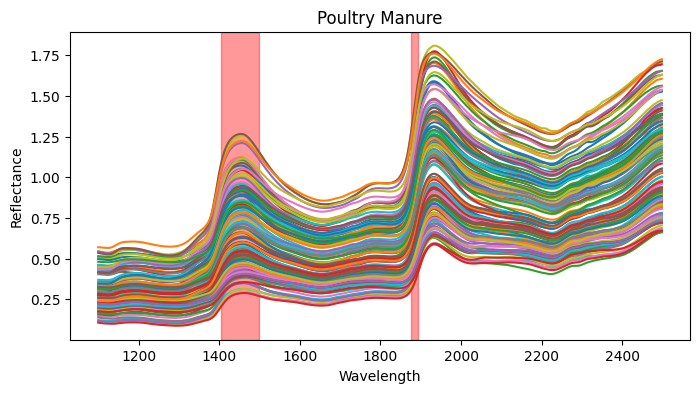

In [32]:
visualize_spectra_special(poultry_spectra,'Poultry Manure', wl_interval)